# IA Heart Disease Dataset from UCI


In [1]:
!pip install pydotplus
!pip install graphviz
!pip install matplotlib
!pip install scipy
!pip install sklearn
!pip install pandas
!pip install numpy

link al conjunto de datos https://www.kaggle.com/ronitf/heart-disease-uci 

## Información provista sobre el conjunto de datos

Citado de el link provisto por el profesor

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

Complete attribute documentation:

1.  age: age in years 
2.  sex: sex (1 = male; 0 = female) 
3.  cp: chest pain type <br>
    -- Value 1: typical angina<br>
    -- Value 2: atypical angina<br>
    -- Value 3: non-anginal pain<br>
    -- Value 4: asymptomatic<br>
4.  trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
5.  chol: serum cholestoral in mg/dl Y
6.  fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7.  restecg: resting electrocardiographic results<br>
    -- Value 0: normal<br>
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br>
8.  thalach: maximum heart rate achieved
9.  exang: exercise induced angina (1 = yes; 0 = no) 
10. oldpeak = ST depression induced by exercise relative to rest 
11. slope: the slope of the peak exercise ST segment<br>
    -- Value 1: upsloping<br>
    -- Value 2: flat<br>
    -- Value 3: downsloping 
12. ca: number of major vessels (0-3) colored by flourosopy 
13. thal: 
    -- 3 = normal
    -- 6 = fixed defect
    -- 7 = reversable defect
14. num: diagnosis of heart disease (angiographic disease status)
    -- Value 0: < 50% diameter narrowing
    -- Value 1: > 50% diameter narrowing (in any major vessel: attributes

In [2]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import argparse
import glob
from pandas import DataFrame
import sklearn
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

#Necesario para graficar el arbol de decision
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/home/emily/snap/jupyter/common/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


importando los datos

In [3]:
dataset=pd.read_csv("heart.csv")

In [4]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Graficaremos las variables numericas y categorias

## Variables Categoricas

Las variables categóricas también se denominan variables cualitativas o variables de atributos. Los valores de una variable categórica son categorías o grupos mutuamente excluyentes. Los datos categóricos pueden tener o no tener un orden lógico. 

## Variables numericas

Las variables numericas

## Clasificando las variables

Dadas las descripciones dadas de los datos del dataset y la definición de lo que es una variable categorica podemos decir que los siguientes atributos son de tipo categorico
- sex
- cp
- fbs
- restecg 
- exang
- slope
- thal
<br>y los siguientes son de tipo numerico
- age
- trestbps
- chol
- thalach 	
- oldpeak
- ca

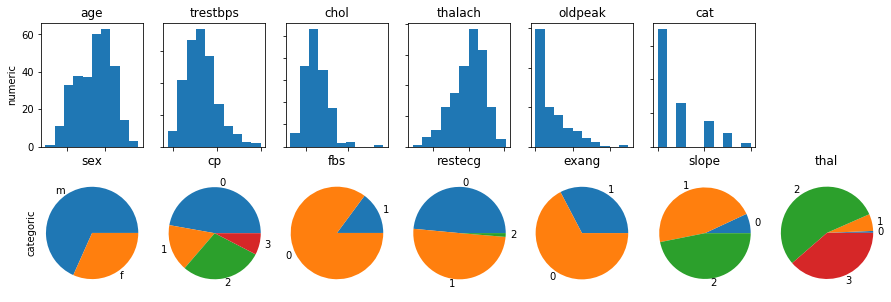

In [5]:
fig, axs = plt.subplots(2, 7, figsize = (15,5))

#numeric

#age
axs[0, 0].hist(dataset.age)
axs[0, 0].set_title('age')
#trestbps
axs[0, 1].hist(dataset.trestbps)
axs[0, 1].set_title('trestbps')
#chol
axs[0, 2].hist(dataset.chol)
axs[0, 2].set_title('chol')
#thalach
axs[0, 3].hist(dataset.thalach)
axs[0, 3].set_title('thalach')
#oldpeak
axs[0, 4].hist(dataset.oldpeak)
axs[0, 4].set_title('oldpeak')
#cat
axs[0, 5].hist(dataset.ca)
axs[0, 5].set_title('cat')

#categoric

#sex
datasex = [dataset.sex.sum(), dataset.sex.shape[0] - dataset.sex.sum()]

axs[1, 0].pie(datasex, labels = ['m','f'])
axs[1, 0].axis('equal')
axs[1, 0].set_title('sex')

#cp
datacp = []
datacp.append((dataset['cp'] == 0).sum())
datacp.append((dataset['cp'] == 1).sum())
datacp.append((dataset['cp'] == 2).sum())
datacp.append((dataset['cp'] == 3).sum())

axs[1, 1].pie(datacp, labels =['0','1','2','3'])
axs[1, 1].axis('equal')
axs[1, 1].set_title('cp')

#fbs
datafbs = [dataset.fbs.sum(), dataset.fbs.shape[0] - dataset.fbs.sum()]

axs[1, 2].pie(datafbs, labels = ['1', '0'])
axs[1, 2].axis('equal')
axs[1, 2].set_title('fbs')

#restecg
datarestecg = []
datarestecg.append((dataset['restecg'] == 0).sum())
datarestecg.append((dataset['restecg'] == 1).sum())
datarestecg.append((dataset['restecg'] == 2).sum())

axs[1, 3].pie(datarestecg, labels = ['0', '1', '2'])
axs[1, 3].axis('equal')
axs[1, 3].set_title('restecg')

#exang
dataexang = [dataset.exang.sum(), dataset.exang.shape[0] - dataset.exang.sum()]

axs[1, 4].pie(dataexang, labels = ['1','0'])
axs[1, 4].axis('equal')
axs[1, 4].set_title('exang')

#slope
dataslope = []
dataslope.append((dataset['slope'] == 0).sum())
dataslope.append((dataset['slope'] == 1).sum())
dataslope.append((dataset['slope'] == 2).sum())

axs[1, 5].pie(dataslope, labels=['0','1','2'])
axs[1, 5].axis('equal')
axs[1, 5].set_title('slope')

#thal 
datathal = []
datathal.append((dataset['thal'] == 0).sum())
datathal.append((dataset['thal'] == 1).sum())
datathal.append((dataset['thal'] == 2).sum())
datathal.append((dataset['thal'] == 3).sum())

axs[1, 6].pie(datathal, labels = ['0','1','2','3'])
axs[1, 6].axis('equal')
axs[1, 6].set_title('thal')


y = ['numeric','categoric']
i = 0
for ax in axs.flat:
    if (i < 6):
        ax.set(xlabel = '', ylabel=y[0])
    else:
        ax.set(xlabel = '', ylabel=y[1])
    i += 1

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.delaxes(axs.flatten()[6])

##  Elementos faltantes

Veremos si hay datos nulos en el conjunto de datos

In [16]:
print(dataset.isnull().sum().sum())

0


Como no hay datos nulos entonces no hay necesidad de llenarlo u obviarlos de los siguientes pasos.

## Partimos los datos en entrenamiento y test
80% para entrenamiento y 20% para test

In [6]:
columnsTitles = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]
features = dataset[columnsTitles].values
target = dataset["target"].values

# Split the data into train and test
trainX, testX, trainY, testY = train_test_split(features, target, test_size=0.2)
print("Conjunto de entrenamiento: ")
print("cantidad de registros: ", trainX.shape[0])
print("cantidad de columnas: ", trainX.shape[1])
print("cantidad de registro target: ", trainY.shape[0])
print("\nConjunto de prueba: ")
print("cantidad de registros: ", testX.shape[0])
print("cantidad de columnas: ", testX.shape[1])
print("cantidad de registros target: ", testY.shape[0])


Conjunto de entrenamiento: 
cantidad de registros:  242
cantidad de columnas:  13
cantidad de registro target:  242

Conjunto de prueba: 
cantidad de registros:  61
cantidad de columnas:  13
cantidad de registros target:  61


## Arbol de decision y matriz de confusión

entrenamos el arbol de decisión.

training set:  98.34710743801654 %
test set:  72.1311475409836 %
confusion matrix: 
[[12  7]
 [10 32]]


Text(0.5, 1.0, 'Matriz de Confusión')

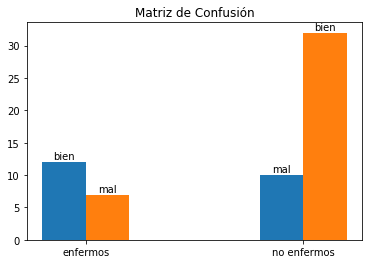

In [7]:
#Control overfitting by setting "max_depth" to 10 and "min_samples_split" to 5 : my_tree_two
modelDesicionTree = tree.DecisionTreeClassifier(max_depth=10, min_samples_split = 5, random_state = 42)
modelDesicionTree = modelDesicionTree.fit(trainX, trainY)

#Print the score on the train data
print("training set: ", modelDesicionTree.score(trainX, trainY)*100, "%")
#Print the score on the test data
print("test set: ", modelDesicionTree.score(testX, testY)*100, "%")

matrixDecisionTree = confusion_matrix(modelDesicionTree.predict(testX), testY)

print("confusion matrix: ")
print(matrixDecisionTree)
#graph of the confusion matrix
label = [0,1]

_X = np.arange(len(label))

x = [matrixDecisionTree[0][0], matrixDecisionTree[1][0]]
y = [matrixDecisionTree[0][1], matrixDecisionTree[1][1]]

training = plt.bar(_X-0.1,x, width=0.2, align='center')
test = plt.bar(_X+0.1,y, width=0.2,  align='center')
plt.xticks(np.arange(2), ['enfermos','no enfermos'])

def autolabel(rects, bars):
    for rect,bar in zip(rects,bars):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height + 0.1, bar,ha='center', va='bottom')

autolabel(training,["bien","mal"])
autolabel(test,["mal", "bien"])

plt.title('Matriz de Confusión')

## Graficamos el arbol de decision

In [9]:
dot_data = StringIO()
export_graphviz(modelDesicionTree, 
                out_file=dot_data,
                filled=True, 
                rounded=True,
                feature_names = list(dataset.columns[:13]),
                class_names = ['no disease','disease'],
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

# Interpretación del modelo obtenido

## Entendiendo los contenidos de los nodos
Para poder comprender nuestro arbol de decision, debemos analizar detalladamente los elementos presentes en cada nodo

### comparacion (Feature):
En el primer elemento de arriba a abajo de cada nodo, se encuentra una operacion logica donde se evalua el valor de algun feature en especifico. Esta comparacion es basicamente una pregunta que se realiza a cada muestra (sample) presente en el nodo, cuando un sample cumple con la condicion dada este es enviado al nodo hijo izquierdo, en caso contrario es enviado al nodo hijo derecho

### gini
El coeficiente de gini es una metrica que cuantifica la pureza de un nodo/hoja. Una coeficiente de gini mayor que cero implica que hay muestras contenidas en el nodo que pertenencen a clases diferentes. Un coeficiente de gini igual a cero significa que el nodo es puro, esto es que en un nodo existen muestras de una sola clase.

### samples
Este valor es solo una suma de todas las muestras de cada clase contenidas en el nodo

### values
Values es una lista que indica cuantas muestras en un nodo dado caen en cada categoria. En nuestro caso tenemos en la posicion 0 la categoria 'no disease/no enfermo' y en la 1 la categoria 'disease/enfermo'

## Divisiones del arbol

Para determinar que feature usar para realizar la primer division (crear el nodo raiz) el algoritmo toma un feature y lo divide. Luego mira los subconjuntos y mide su impureza usando el coeficiente de gini. Esto es realizado para diferentes umbrales y luego determina que la mejor division para un feature dado es aquel que produce los subconjuntos mas puros. Este proceso es repetido para todos los features en el conjunto de entrenamiento. Por ultimo, el nodo raiz es determinado por el feature que produce una division con los subconjuntos mas puros. Una vez que el nodo raiz es decidido, el arbol crece a una profundidad de uno. Este proceso es repetido para los otros nodos en el arbol.

## Modelo de Ingenuo de Bayes

Entrenamos modelo de bayes ingenuo


training set:  82.64462809917356 %
test set:  90.1639344262295 %
confusion matrix: 
[[18  2]
 [ 4 37]]


Text(0.5, 1.0, 'Matriz de Confusión')

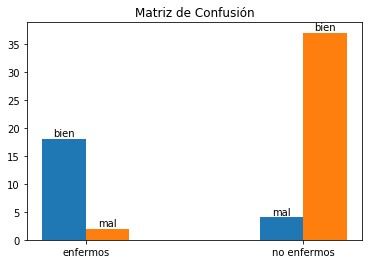

In [10]:
gnb = GaussianNB()

gaussianModel = gnb.fit(trainX, trainY)

#Print the score on the train data
print("training set: ", gaussianModel.score(trainX, trainY) * 100, "%")
#Print the score on the test data
print("test set: ", gaussianModel.score(testX, testY)*100, "%")

matrixGaussian = confusion_matrix(gaussianModel.predict(testX), testY)

print("confusion matrix: ")
print(matrixGaussian)

label = [0,1]

_X = np.arange(len(label))

x = [matrixGaussian[0][0], matrixGaussian[1][0]]
y = [matrixGaussian[0][1], matrixGaussian[1][1]]

training = plt.bar(_X-0.1,x, width=0.2, align='center')
test = plt.bar(_X+0.1,y, width=0.2,  align='center')
plt.xticks(np.arange(2), ['enfermos','no enfermos'])

def autolabel(rects, bars):
    for rect,bar in zip(rects,bars):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height + 0.1, bar,ha='center', va='bottom')

autolabel(training,["bien","mal"])
autolabel(test,["mal", "bien"])

plt.title('Matriz de Confusión')

## Interpretación del modelo Ingenuo de Bayes

La inferencia bayesiana es un método estadístico, en el que el teorema de Bayes se usa para actualizar la probabilidad de una hipótesis a medida que hay más evidencia o información disponible.

En este caso, los datos de entrenamiento corresponden a una cantidad de datos considerables de la muestra. El algoritmo consiste en tomar los datos de entrenamiento y calcular la probabilidad de que el atributo target sea 1 ó 0 dados unos valores anteriores.

Este metodo no tiene parametros modificables dada la naturaleza de su estrategia para determinar si hay o no enfermedades en el grupo de datos de prueba.

Para las pruebas ejecutadas, el exito de las mismas, se encuentra alrededor del 80%, porcentaje cercano al relacionado con el entrenamiento, lo que podria ser interpretado como una consistencia a lo largo del conjunto de datos en la muestra, siendo razonable su probabilidad de acierto dados los datos anteriores para determinar la presencia de enfermedades cardiovasculares.

## Red Neuronal

On training:  80.99173553719008 %

On test:  80.32786885245902 %
confusion matrix: 
[[14  4]
 [ 8 35]]


Text(0.5, 1.0, 'Matriz de Confusión')

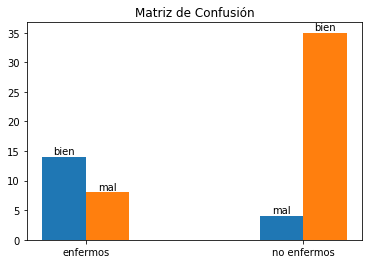

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# NN is sensitive to data scale. We must normilize
scaler = StandardScaler()  
trainXX = trainX.copy()
testXX = testX.copy()
# Don't cheat - fit only on training data
scaler.fit(trainX)  
trainXX = scaler.transform(trainXX)  
# apply same transformation to test data
testXX = scaler.transform(testXX)  

modelNeuralNetwork = MLPClassifier(solver='lbfgs', alpha=1e-3, activation = 'relu', max_iter=5000,
                     hidden_layer_sizes = (12,10,8,6,4,2), random_state=1, verbose = True)

modelNeuralNetwork.fit(trainXX, trainY)                         

#Print the score on the train data
print("On training: ", modelNeuralNetwork.score(trainXX, trainY)*100, "%")
#matrix = confusion_matrix(model3.predict(trainXX), trainY)

#Print the score on the test data
print("\nOn test: ", modelNeuralNetwork.score(testXX, testY)*100, "%")

matrixNeuralNetwork = confusion_matrix(modelNeuralNetwork.predict(testXX), testY)

print("confusion matrix: ")
print(matrixNeuralNetwork)

label = [0,1]

_X = np.arange(len(label))


x = [matrixNeuralNetwork[0][0], matrixNeuralNetwork[0][1]]
y = [matrixNeuralNetwork[1][0], matrixNeuralNetwork[1][1]]

training = plt.bar(_X-0.1,x, width=0.2, align='center')
test = plt.bar(_X+0.1,y, width=0.2,  align='center')
plt.xticks(np.arange(2), ['enfermos','no enfermos'])

def autolabel(rects, bars):
    for rect,bar in zip(rects,bars):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height + 0.1, bar,ha='center', va='bottom')

autolabel(training,["bien","mal"])
autolabel(test,["mal", "bien"])

plt.title('Matriz de Confusión')


## Interpretación del modelo de Redes Neuronales

<img src="mlp_network.png" alt="Figura 1: Perceptron multicapa" style="width: 400px;"/>

Un perceptron multi capa es un algoritmo de aprendizaje supervizado que aprende una funcion $f(\cdot ):R^{m}\rightarrow R^{o}$ entrenandose con un conjunto de datos (dataset). donde $m$ es el numero de dimensiones de entrada y $o$ es el numero de dimensiones de salida. Dado un conjunto de catacteristicas $X=x_1,x_2,...,x_m$ y un target $y$, la red puede aprender un aproximador de funcion no lineal para clasificacion o regresion. Entre la capa de entrada y la de salida, puede haber una o más capas no lineales, llamadas capas ocultas. La Figura 1 muestra un MLP de una capa oculta con salida escalar.

La capa más a la izquierda, conocida como capa de entrada, consiste en un conjunto de neuronas $\left \{ x_i|x_1, x_2, ..., x_m \right \}$ que representan los features de entrada. Cada neurona en la capa escondida transforma los valores de una capa anterior con una suma lineal ponderada $w_1x_1 +w_2x_2+...+w_mx_m$, seguida de una funcion de activacion no lineal - como la funcion tangente hiperbolica. La función de activación se encarga de devolver una salida a partir de un valor de entrada, normalmente el conjunto de valores de salida en un rango determinado como $(0,1)$ o $(-1,1)$. Se buscan funciones que las derivadas sean simples, para minimizar con ello el coste computacional.

## MLPClassifier

La clase MLPclassifier implementa un algoritmo de perceptron multicapa que entrena usando retropropagacion
### Backpropagation 

Una vez que se ha aplicado un patrón a la entrada de la red como estímulo, este se propaga desde la primera capa a través de las capas siguientes de la red, hasta la ultima capa de la red donde se genera una salida. La señal de salida se compara con la salida deseada y se calcula una señal de error para cada una de las salidas.

Esta señal de error se propagan hacia atrás, partiendo de la capa de salida, hacia todas las neuronas de la capa oculta que contribuyen directamente a la salida. Sin embargo las neuronas de la capa oculta solo reciben una fracción de la señal total del error, basándose aproximadamente en la contribución relativa que haya aportado cada neurona a la salida original. Este proceso se repite, capa por capa, hasta que todas las neuronas de la red hayan recibido una señal de error que describa su contribución relativa al error total.

La importancia de este proceso consiste en que, a medida que se entrena la red, las neuronas de las capas intermedias se organizan a sí mismas de tal modo que las distintas neuronas aprenden a reconocer distintas características del espacio total de entrada.

## Comparación de los 3 modelos

Compare los resultados de los 3 modelos usados en términos de la precisión, la estabilidad y la interpretabilidad de los resultados.

## Precisión

Cuando predice positivo, porcentaje clasificado correctamente ${vp} / {prediccion positivos}$, se busca un valor cercano a 1


In [14]:
print("precision arbol de decision",matrixDecisionTree[0][0] / (matrixDecisionTree[0][0] + matrixDecisionTree[1][0]))
print("precision modelo de bayes",matrixGaussian[0][0]/(matrixGaussian[0][0]+ matrixGaussian[1][0]))
print("precision red neuronal",matrixNeuralNetwork[0][0] / (matrixNeuralNetwork[0][0] + matrixNeuralNetwork[1][0])) 

precision arbol de decision 0.5454545454545454
precision modelo de bayes 0.8181818181818182
precision red neuronal 0.6363636363636364


## Estabilidad 

Diferencia entre el puntaje del conjunto de entrenamiento y el conjunto de prueba, se busca que sea pequeña

In [15]:
print("estabilidad arbol de decision",abs(modelDesicionTree.score(trainX, trainY)*100 - modelDesicionTree.score(testX, testY)*100))
print("estabilidad modelo de bayes",abs(gaussianModel.score(trainX, trainY) * 100 - gaussianModel.score(testX, testY) * 100))
print("estabilidad red neuronal",abs(modelNeuralNetwork.score(trainXX, trainY)*100 - modelNeuralNetwork.score(testXX, testY)*100))

estabilidad arbol de decision 26.21595989703293
estabilidad modelo de bayes 7.5193063270559435
estabilidad red neuronal 0.6638666847310617


## Interpretabilidad



## Comparación 

Primero se busco cuales son los factores que pueden provocar enfermedades del corazon y si alguna esta presente entre los datos proporcionados por el conjunto de datos, entre ellos encontramos: 

- hipertension - presente en el conjunto de datos
- nivel de colesterol alto - presente en el conjunto de datos
- diabetes - presente en el conjunto de datos
- obesidad y sobrepeso
- tabaquismo
- inactividad fisica
- sexo masculino - presente en el conjunto de datos
- hereditario
- edad avanzada - presente en el conjunto de datos

entre otros

[fuente](https://www.texasheart.org/heart-health/heart-information-center/topics/factores-de-riesgo-cardiovascular/)

Algunos de los datos en el conjunto de datos son factores de riesgo reconocidos hoy en dia para el diagnostico.

Revisando los resultados obtenidos de precision y estabilidad, el arbol de decision tanto en precision como en estabilidad presenta resultados no cercanos al deseado, y tanto los del modelo ingenuo de bayes como redes neuronales presentan resultados en estos aceptables.

Respecto al modelo ingenuo de bayes ya que es un metodo estadistico, y entre los datos habia factores de riesgo, era un metodo apropiado y tenia los factores para funcionar correctamente.